<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/06.01-Empirical-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical gain tuning

This notebook were inspired in this video.

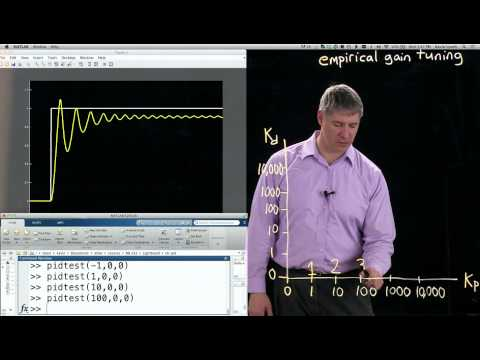

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('uXnDwojRb1g')

## Summary

Let's try to empirical tune an ideal PID controller of a servo control loop with a plant modelled as a second order system. 

In order to make the things simpler, let's assume $G_a(s) = G_m(s) = 1$.

## Initializations

In [2]:
import scipy as sp
import numpy as np
!pip install control
from control.matlab import *
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

     |████████████████████████████████| 357 kB 5.5 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=4533ca67e56275e34bfab05323e7428da48eaa3b68c3e7b39740004a793964ab
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


## Simulation function

We wrapped the simulation and plot processes in the following function:

In [101]:
def pidtest(Kp, Ki, Kd, 
            alpha = 0.02,
            num   = [1e-1],
            den   = [20**2, 2*0.5*20, 1],
            theta = 0,
            t0 = 25,
            T  = np.arange(0, 10*20, 0.2),
            test = True):
  
  Gp = Gcl = tf(num, den)
  plt.title('Process reaction curve')
  if test == True:
    Gc  = tf([Kd, Kp, Ki], [alpha*Kd/Kp, 1, 0])
    Gcl = feedback(Gc*Gp, 1)
    plt.title('Servo control response \n Kp = {0} | Ki = {1} | Kd = {2}'.format(Kp,Ki,Kd))
  u = np.ones(len(T))
  u[T<=t0] = 0
  ud = np.ones(len(T))
  ud[T<=(t0+theta)] = 0
  y = lsim(Gcl, ud, T)[0]
  plt.plot(T, y, T, u)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend(['Output', 'Input'])
  if test != True:
    d = pd.DataFrame({'Time': T, 'Input': u, 'Output': y})
    return data_table.DataTable(d, include_index = False)

## Tuning process

Similiar to the inspirational video, let's first try a PID controller with only the P action and $K_p = -1$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


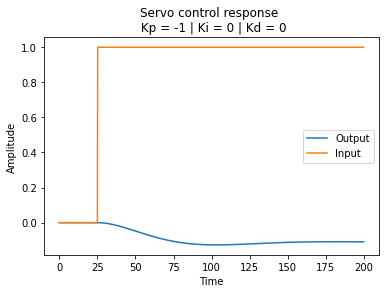

In [102]:
pidtest(-1,0,0) # run 0

It's clear that the controller gain choosen has the wrong sign. 

It must have a positive sign instead of a negative one. Let's correct the sign and try again.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


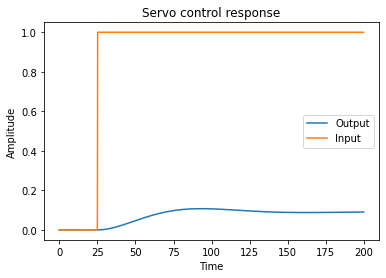

In [52]:
pidtest(1,0,0) # run 1

The offset is to high! Let's increase the P action gain one order of magnitude and see what happens.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


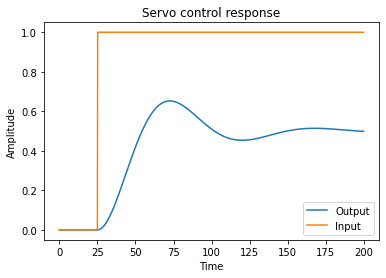

In [53]:
pidtest(10,0,0) # run 2

The offset was reduced, but it is almost 50% yet. Let's increase the P action gain one order of magnitude again and see what happens.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


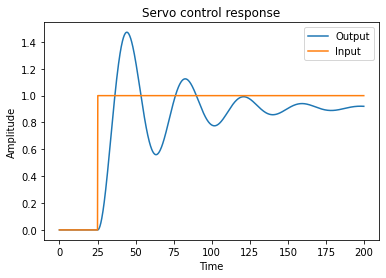

In [56]:
pidtest(100,0,0) # run 3

The offset was reduced again (as the theory tells us) and now it is only 10%. 

Let's increase the P action gain one order of magnitude again and see what happens.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


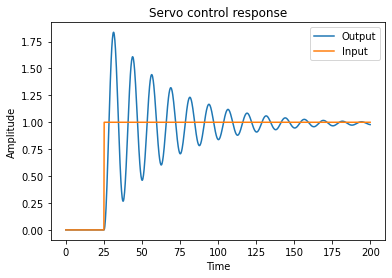

In [57]:
pidtest(1000,0,0) # run 4

The offset is nearly 0%, but this reduction came with a lot of oscillation and an overshoot of more than 75%. 

Let's back to the earlier value of the P action and try to improve the performance by using the D action.

Now, let's do the same process with the D action gain starting with $K_d = 1$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


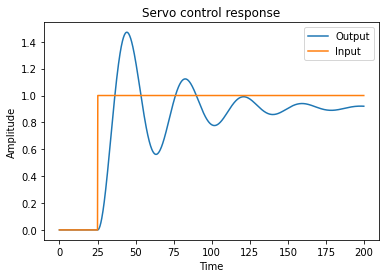

In [58]:
pidtest(100,0,1) # run 5

We need more damping, let's try increase the D action gain one order of magnitude.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


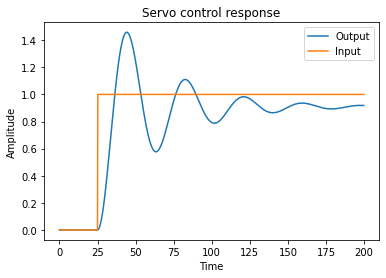

In [59]:
pidtest(100,0,10) # run 6

More damping, please!

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


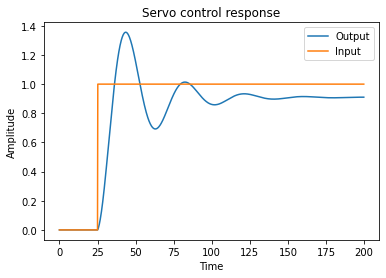

In [60]:
pidtest(100,0,100) # run 7

More damping again, please!

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


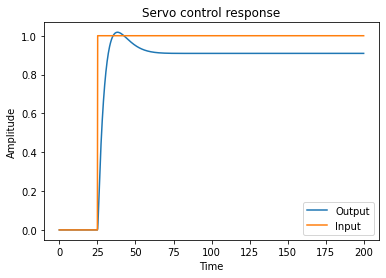

In [61]:
pidtest(100,0,1000) # run 8

Just a bit more damping.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


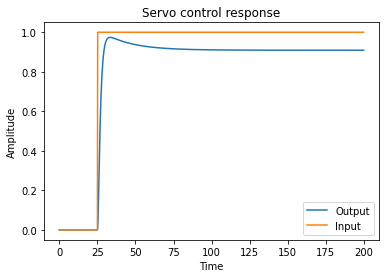

In [62]:
pidtest(100,0,2000) # run 9

The theory also tell us that neither P action or D action alone or even combined are able to eliminate offset. 

So, we will need the I action in order to get rid of this offset.

Now, let's do the same process with the I action gain starting with $K_i = 1$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


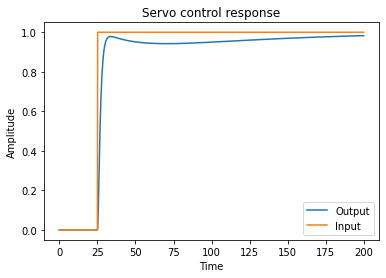

In [63]:
pidtest(100,1,2000) # run 10

Not enough I action, let's increase it.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


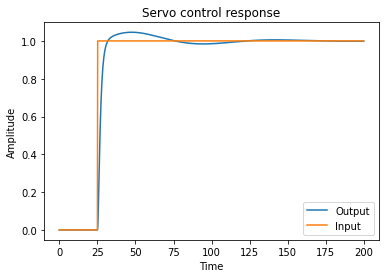

In [64]:
pidtest(100,10,2000) # run 11

The offset was eliminated, but what will happen if we increase more the I action?

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


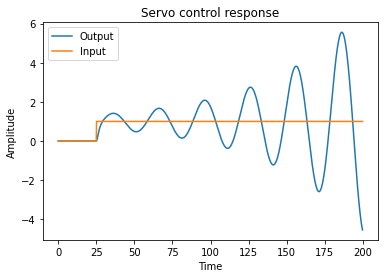

In [65]:
pidtest(100,100,2000) # run 12

Ops! Something thing really bad happens, didn't it? 

The control loop becames unstable due too much I action. 

Let's move back to the earlier I action gain value, but reducing it by half in order to eliminate the small overshoot observed.

In another words, let's try $K_i = 5$.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


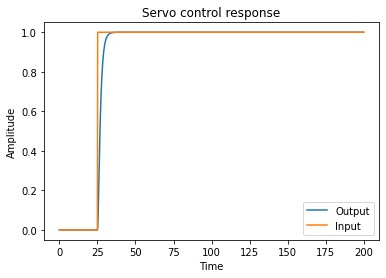

In [66]:
pidtest(100,5,2000) # run 13

Wunderbar! We achieve a fast closed loop response with no overshoot!

The PID tuning settings from our empirical tuning process are $K_p = 100$, $K_i = 5$ and $K_d = 2000$.

Let's zooming the closed loop response to see in detail how fast it is.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


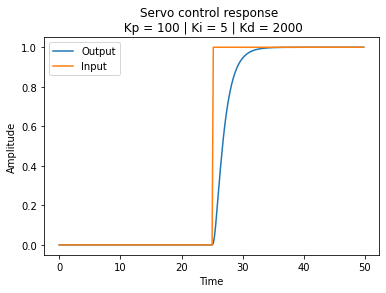

In [89]:
pidtest(100,5,2000,T=np.arange(0, 50, 0.2))